# **关于微软认知服务(Azure Cognitive Service)** #

**认知服务使每位开发人员无需具备机器学习的专业知识就能接触到 AI。只需要一个 API 调用，就可以将看、听、说、搜索、理解和加速决策的能力嵌入到应用中。让所有技能水平的开发人员都能轻松在其应用中添加 AI 功能。**

<img src='./img/000.png'/>

**你可以用任意的编程语言，根据你的业务需求，调用微软认知服务，就可以对接计算机视觉，自然语言，知识图谱的业务。**

<img src='./img/001.png'/>

## **关于计算机视觉** ##

**计算机视觉是一门研究如何使机器“看”的科学，更进一步的说，就是是指用摄影机和电脑代替人眼对目标进行识别、跟踪和测量等机器视觉，并进一步做图形处理，使电脑处理成为更适合人眼观察或传送给仪器检测的图像。作为一个科学学科，计算机视觉研究相关的理论和技术，试图建立能够从图像或者多维数据中获取‘信息’的人工智能系统。**<br/>
**使用 Azure 认知服务中的计算机视觉，将云视觉功能嵌入你的应用，可提高内容的可发现性、自动化文本提取、实时分析视频和创建更多用户可使用的产品。使用视觉数据处理以通过对象和概念标记内容、提取文本、生成图像说明、审查内容以及理解用户在物理空间中的移动。无需机器学习专业知识即可使用.**

<img src='./img/002.png' />

## **通过Python安装微软认知服务的计算机视觉SDK** ##

<font style="color:red">注意你可以用任意的语言调用微软认知服务，不只是Python</font>

**如果你有关于Python安装的相关疑问，你可以通过以下文档完成相关的操作**

<a href="https://github.com/kinfey/HandsOnLab/blob/master/MLNetLab/docs/00_Windows_Install_Python.pdf">关于Windows的Python安装指引请点击该链接查看</a>


<a href="https://github.com/kinfey/HandsOnLab/blob/master/MLNetLab/docs/00_Windows_Install_Python.pdf">关于Linux/macOS/WSL 2 的Python安装指引请点击该链接查看</a>

### **关于Azure Cognitive Services Computer Vision SDK for Python** ###

**通过SDK你可以完成：图像分析，图像文本提取，缩略图等任务**

```python
pip3 install azure-cognitiveservices-vision-computervision
```

## **示例一** ##

**光学字符识别（Optical Character Recognition, OCR）是指对文本资料的图像文件进行分析识别处理，获取文字及版面信息的过程。亦即将图像中的文字进行识别，并以文本的形式返回。**
**本实例你可以通过认识服务去提取图片的文字**

SDK环境安装

In [1]:
! pip3 install --upgrade azure-cognitiveservices-vision-computervision

机器学习常用的一些库安装

In [2]:
! pip3 install opencv-python pillow matplotlib

引入计算机视觉的库

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [4]:
from array import array
import os
from PIL import Image
import sys
import time

### **开通Azure上的认知服务** ###

<font style='color:Red'>如果你没有Azure订阅，你可以去开通免费的账号，请点击免费账号地址获取<a href="https://azure.microsoft.com/zh-cn/free/">https://azure.microsoft.com/zh-cn/free/</a></font>

开通Azure后，就可以开始使用认识服务了，请使用以下步骤：

1. 登录进入Portal,选择创建资源组(Create a Resource)<br/>
   <br/><img src='./img/003.png'/></br>
2. 选择AI+Machine Learning，选择计算机视觉(Computer Vision)<br/>
   <br/><img src='./img/004.png'/></br>
3. 填充好相关的信息，就可以创建计算机视觉服务了<br/>
   <br/><img src='./img/005.png'/></br>
4. 创建好后，Azure门户你就会跳转到所创建的计算机视觉环境内了<br/>
   <br/><img src='./img/006.jpg'/></br>
5. 你需要获取endpoint以及keys(点击Manage keys获取)<br/>
   <br/><img src='./img/007.png'/></br>

<font style='color:Red'>你必须要获取好key和endpoint，否则你没办法调用</font>

接下来就是代码工作了

输入刚才获取的key 和 endpoint

In [5]:
subscription_key = "3743b6ce68b644e4a9f0ff395d7d0e9d"
endpoint = "https://studentocrdemo.cognitiveservices.azure.com/"

创建ComputerVisionClient 类，传入key和endpoint

In [6]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [7]:
read_image_url = "https://azurecomcdn.azureedge.net/cvt-a526267eb4f7e890bc106c4f865c31f21fa5b2d8a68493c852191e9bbb2ca1da/images/shared/cognitive-services-demos/analyze-image/analyze-4-thumbnail.jpg"

read_response = computervision_client.read(read_image_url,  raw=True)

In [8]:
# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

LIFE IS LIKE
[2.0, 15.0, 137.0, 9.0, 138.0, 21.0, 2.0, 27.0]
RIDINO
[29.0, 31.0, 72.0, 30.0, 72.0, 38.0, 29.0, 39.0]
A BICYCLE
[77.0, 28.0, 148.0, 26.0, 148.0, 36.0, 77.0, 38.0]
TO KEEP
[15.0, 51.0, 67.0, 49.0, 67.0, 57.0, 15.0, 60.0]
YOUR BALANCE
[72.0, 48.0, 163.0, 44.0, 164.0, 52.0, 72.0, 56.0]
YOU MUST
[23.0, 64.0, 83.0, 67.0, 83.0, 75.0, 23.0, 73.0]
KEEP MOVINO
[84.0, 68.0, 167.0, 70.0, 166.0, 79.0, 84.0, 76.0]



## **示例二** ##

**通过REST协议调用认知服务中的计算机视觉服务**

**通过以下的文档，你可以获取API的访问方法<a href="https://westus.dev.cognitive.microsoft.com/docs/services/computer-vision-v3-2/operations/5d986960601faab4bf452005">https://westus.dev.cognitive.microsoft.com/docs/services/computer-vision-v3-2/operations/5d986960601faab4bf452005</a>**

In [9]:
import json
import os
import os.path
import sys
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO
import cv2

In [10]:
text_recognition_url = endpoint + "vision/v3.2/read/analyze"

In [11]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
filename = "medicine.jpg"
root, ext = os.path.splitext(filename)

In [12]:
image_data = open(filename, "rb").read()

root, ext = os.path.splitext(filename)

In [13]:
from PIL import Image
import cv2 
from IPython.display import display
img = cv2.imread(filename,1)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

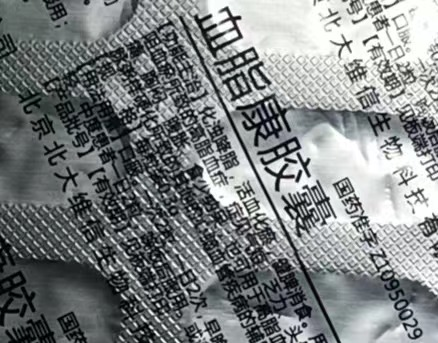

In [14]:
display(Image.fromarray(img2))

In [15]:
image_data = cv2.imencode(ext, img2)[1].tobytes()

In [16]:

response = requests.post(text_recognition_url, headers=headers, data=image_data)
response.raise_for_status()

In [17]:
operation_url = response.headers["Operation-Location"]

In [18]:
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    
    print(json.dumps(analysis, indent=4))

    time.sleep(1)
    if ("analyzeResult" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'failed'):
        poll = False

{
    "status": "running",
    "createdDateTime": "2021-10-08T03:09:32Z",
    "lastUpdatedDateTime": "2021-10-08T03:09:32Z"
}
{
    "status": "succeeded",
    "createdDateTime": "2021-10-08T03:09:32Z",
    "lastUpdatedDateTime": "2021-10-08T03:09:34Z",
    "analyzeResult": {
        "version": "3.2.0",
        "modelVersion": "2021-04-12",
        "readResults": [
            {
                "page": 1,
                "angle": 64.6062,
                "width": 438,
                "height": 343,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            401,
                            6,
                            421,
                            51,
                            406,
                            58,
                            386,
                            11
                        ],
                        "text": "\u53e3\u611f\u3002",
                        "words": [


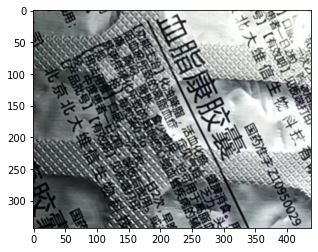

In [19]:
polygons = []
if ("analyzeResult" in analysis):
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["analyzeResult"]["readResults"][0]["lines"]]

image = Image.fromarray(img2)
ax = plt.imshow(image)

In [20]:
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  
plt.rcParams['axes.unicode_minus'] = False  

口感。
患者一日遊元每次
号】【有效期上见板端打印
北大维信生物科技
UuuuK
国药准字Z10950029
血脂康胶囊
能主治】化浊降脂,活血化瘀上健脾消
无致的高脂血症,症久气发
チカ
也可用于
高脂
用
日2次,早
中度患者
品批号】【有效期
北京北大维


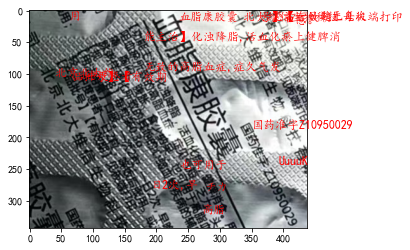

In [21]:
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    print(text)
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=12, color='red', va='top')
plt.imshow(image)